In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict
from itertools import combinations
from sklearn import metrics

plt.rcParams['figure.figsize'] = [16, 4]
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'legend.fontsize': 15})
plt.rcParams['figure.figsize'] = [9, 9]

In [4]:
method_prediction_dict = {
    "Direct(loss)":dict(
                    spurious_ft_te = np.array([0.01,0.13,0.24,0.37,0.49,0.67]),
                    causal_ft_te = np.array([0.25,0.30,0.30,0.30,0.31,0.31]),
    ),
    "Riesz(loss)":dict(
                    spurious_ft_te = np.array([0.06,0.19,0.31,0.42,0.58,0.70]),
                    causal_ft_te = np.array([0.29,0.32,0.30,0.29,0.29,0.29]),
    )  
}

[]

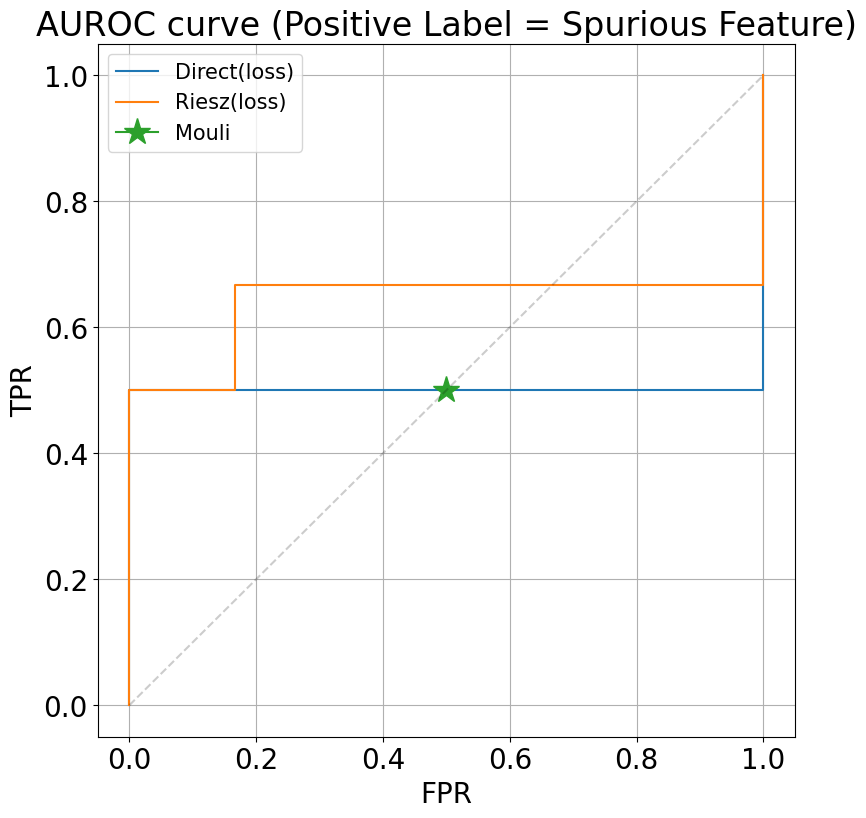

In [25]:
pos_label="spurious" #or causal
fig,ax = plt.subplots(1,1)
for method in method_prediction_dict.keys():
    #Default pos is spurious
    point_labels = np.array([1]*len(method_prediction_dict[method]["spurious_ft_te"]) +\
                        [0]*len(method_prediction_dict[method]["causal_ft_te"]))
    point_scores = np.concatenate([method_prediction_dict[method]["spurious_ft_te"],
                                  method_prediction_dict[method]["causal_ft_te"]],
                                  axis=0,
    )
    if pos_label=="causal":
        point_labels = 1-point_labels
        point_scores = 1-point_scores

    #Getting the tpr and fpr things to plot
    fpr, tpr, thresholds = metrics.roc_curve(point_labels, point_scores)
    ax.plot(fpr,tpr,"-",label=method)
    ax.grid(True)
    

ax.plot([0.5],[0.5],marker="*",markersize=20,label="Mouli")
ax.plot([0.0,1.0],[0.0,1.0],"--",color="k",alpha=0.2)
ax.legend()
ax.set_title("AUROC curve (Positive Label = Spurious Feature)")
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")

plt.savefig("syntext_unobs_conf_aucroc.pdf", format="pdf", bbox_inches="tight")
plt.plot()